# Análisis Simulaciones MadGraph/Pythia8/Delphes
Los outputs están en *sim_outputs/*.

In [1]:
import awkward as ak
import pandas as pd
import numpy as np
import vector
from coffea.nanoevents import NanoEventsFactory
from coffea.nanoevents import NanoAODSchema, DelphesSchema
import mplhep as hep
import matplotlib.pyplot as plt
import seaborn as sns
import DM_HEP_AN as dm
from math import pi
from funcs import *
hep.style.use("CMS")
#%matplotlib inline
plt.ioff()

## Simulación con $g_{Sg} = 1.0$ únicamente
Masas: $m_{\chi} = 10$ GeV, $m_{Y_{0}} = 100$ GeV ($m_{Y_{0}} = 2$ TeV)

## Simulación con $g_{Sg2} = 1.0$ únicamente
Masas: $m_{\chi} = 10$ GeV, $m_{Y_{0}} = 100$ GeV ($m_{Y_{0}} = 2$ TeV), proceso p p > y0 y0 j j, y0 > xd xd~, y0 > xd xd~

## Simulación con $g_{Sg1} = 1.0$ y $g_{Sg2} = 1.0$ únicamente
Masas: $m_{\chi} = 10$ GeV, $m_{Y_{0}} = 100$ GeV ($m_{Y_{0}} = 2$ TeV)

## Simulación con $g_{Sq} = 1.0$ únicamente
$q = u,d,c,s,b,t$



Masas: $m_{\chi} = 10$ GeV, $m_{Y_{0}} = 100$ GeV ($m_{Y_{0}} = 2$ TeV)

In [2]:
cases = ["gSq_only","gSg1_only", "gSg2_only_y0y0", "gSg_only"]
csvDir = "sim_outputs/csv/"
nFiles = 2
nMassPoints = 2
dataSignal = {}
for i in cases:
    dataSignal[i] = []
    for j in range(nMassPoints):
        csvFiles = [csvDir+f"DM_{i}_{j+1}_{k+1}.csv" for k in range(nFiles)]
        dfs = [pd.read_csv(csvFile) for csvFile in csvFiles]
        data = pd.concat(dfs)
        data = construct_variables(data)
        dataSignal[i].append(data)
        data.to_csv(csvDir+f"DM_{i}_{j}.csv")

In [3]:
dataSignal[cases[0]][0]

,jet_pt0,jet_pt1,jet_pt2,jet_pt3,jet_eta0,jet_eta1,jet_eta2,jet_eta3,jet_phi0,jet_phi1,...,jet_tautag1,jet_tautag2,jet_tautag3,missinget_met,missinget_phi,Delta_phi,Delta_rapidity,Inv_mass,Rapidity_prod,Hadronic_energy
0,49.691574,45.861570,42.341183,16.855547,0.435542,-1.089927,1.321412,-0.391989,2.076887,-1.358401,...,0.0,0.0,0.0,5.376617,-2.380947,2.847897,1.525469,168.743605,-0.474709,154.749874
1,44.525238,39.983227,34.839405,20.777710,3.255920,2.162312,0.676269,-0.663654,0.550502,0.753287,...,0.0,0.0,0.0,17.368359,-1.881266,0.202785,1.093608,47.713131,7.040314,140.125580
2,93.582085,28.226837,25.769690,21.790133,2.045043,1.828743,2.250178,0.991504,1.452872,-2.212392,...,0.0,0.0,0.0,4.753943,-1.174231,2.617921,0.216299,176.049741,3.739858,169.368745
3,112.044785,44.333110,38.043396,27.040367,0.663748,-1.151823,-0.398679,0.224925,-0.424258,2.336001,...,0.0,0.0,0.0,5.047852,1.332696,2.760259,1.815571,217.914566,-0.764520,221.461658
4,77.532760,54.589172,33.595535,25.965725,1.071832,-0.464770,-1.658974,0.848499,-1.177475,2.185976,...,0.0,0.0,0.0,3.928717,-1.897652,2.919735,1.536601,241.032142,-0.498155,191.683192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,79.651180,64.113820,63.071968,42.328102,1.780420,0.307291,2.732202,1.797520,-0.479109,2.008328,...,0.0,0.0,0.0,5.989812,2.783296,2.487437,1.473129,195.984971,0.547107,249.165070
49996,72.461080,61.367474,34.894188,20.088385,-1.916276,-2.778312,-0.449727,-0.600059,2.645461,0.252224,...,0.0,0.0,0.0,4.137691,2.893714,2.393237,0.862037,191.534423,5.324011,188.811127
49997,134.415250,74.313610,73.706710,49.867905,0.760511,-2.308129,-0.800649,-0.357654,-3.105394,-0.568610,...,0.0,0.0,0.0,3.695621,-0.392763,2.536784,3.068640,297.173504,-1.755359,332.303475
49998,71.587480,30.998316,28.576796,24.139110,1.705458,1.652801,1.314954,-1.108968,2.233989,-0.411460,...,0.0,0.0,0.0,8.617407,-1.264526,2.645448,0.052656,164.254729,2.818783,155.301702


Plots

In [4]:
# Análisis con csv file
data_gSg1 = dataSignal['gSg1_only']
folder = 'Plots/gSg1/mx10_my_100_'
makePlots(data_gSg1[0],folder=folder)
folder = 'Plots/gSg1/mx10_my_2000_'
makePlots(data_gSg1[1],folder=folder)

# Análisis con csv file
data_gSg2 = dataSignal['gSg2_only_y0y0']
folder = 'Plots/gSg2_y0y0/mx10_my_100_'
makePlots(data_gSg2[0],folder=folder)
folder = 'Plots/gSg2_y0y0/mx10_my_2000_'
makePlots(data_gSg2[1],folder=folder)

data_gSg = dataSignal['gSg_only']
folder = 'Plots/gSg/mx10_my_100_'
makePlots(data_gSg[0],folder=folder)
folder = 'Plots/gSg/mx10_my_2000_'
makePlots(data_gSg[1],folder=folder)

data_gSq = dataSignal['gSq_only']
folder = 'Plots/gSq/mx10_my_100_'
makePlots(data_gSq[0], folder=folder)
folder = 'Plots/gSq/mx10_my_2000_'
makePlots(data_gSq[1], folder=folder)

Background

In [5]:
csvFile = "./background/ZpJets.csv"
data_ZpJ = pd.read_csv(csvFile)
csvFile = "./background/WpJets.csv"
data_WpJ = pd.read_csv(csvFile)

In [6]:
data_gSg1[0]

,jet_pt0,jet_pt1,jet_pt2,jet_pt3,jet_eta0,jet_eta1,jet_eta2,jet_eta3,jet_phi0,jet_phi1,...,jet_tautag1,jet_tautag2,jet_tautag3,missinget_met,missinget_phi,Delta_phi,Delta_rapidity,Inv_mass,Rapidity_prod,Hadronic_energy
0,53.406796,51.995197,48.928417,35.102530,-1.824540,-0.957795,-2.263328,-0.176492,-2.615544,-0.557834,...,0.0,0.0,0.0,4.176687,-3.141149,2.057710,0.866745,119.659984,1.747536,189.432940
1,338.758600,212.836150,182.649520,28.322784,0.539825,1.822914,-1.176199,0.265465,1.659329,-2.028916,...,0.0,0.0,0.0,1.462361,1.750560,2.594940,1.283088,831.332684,0.984055,762.567054
2,55.683840,27.669699,17.362839,15.786724,-1.182789,-0.063805,-0.875416,-0.694622,1.577398,-1.828205,...,0.0,0.0,0.0,5.905727,2.283441,2.877582,1.118984,149.155026,0.075468,116.503102
3,89.719120,83.592514,74.670334,58.289100,0.999499,1.552162,0.594847,0.274169,-2.489573,2.715004,...,0.0,0.0,0.0,1.827411,3.083168,1.078608,0.552664,85.176654,1.551384,306.271068
4,52.540466,47.331740,42.104885,26.820915,2.640989,2.156304,-1.375033,-1.874263,-2.745460,1.133007,...,0.0,0.0,0.0,3.758757,2.773648,2.404718,0.484685,148.988497,5.694777,168.798006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,65.872180,46.705730,40.322617,21.725767,-1.539986,1.101951,-0.441905,-2.050978,-0.119117,-3.123833,...,0.0,0.0,0.0,4.442686,-0.076434,3.004716,2.641937,137.200792,-1.696989,174.626294
49996,52.949417,52.415497,27.185654,26.070460,1.065237,1.064467,0.476903,-0.667447,0.514160,-2.993802,...,0.0,0.0,0.0,10.100590,-2.771299,2.775224,0.000770,197.851844,1.133910,158.621028
49997,123.924805,107.883415,84.915310,82.411040,0.175755,-2.756801,-3.342751,0.375289,-0.320798,-2.974998,...,0.0,0.0,0.0,3.688788,-1.043240,2.654200,2.932556,246.499530,-0.484521,399.134570
49998,78.421950,56.526430,35.960750,21.344000,3.359494,3.444574,3.653497,-0.445746,0.090783,-2.753687,...,0.0,0.0,0.0,2.286211,2.583377,2.844470,0.085080,259.947131,11.572025,192.253130


In [7]:
folder = 'Plots/gSg1/'
datas = [data_ZpJ, data_WpJ, data_gSg1[0], data_gSg1[1]]
names = ['Z+Jets','W+Jets','gSg1 MY0=100GeV', 'gSg1 MY0=2TeV']
plotObservable(datas, names, 'Delta_phi', folder=folder)
plotObservable(datas, names, 'Inv_mass', folder=folder)
plotObservable(datas, names, 'Delta_rapidity', folder=folder)

In [8]:
folder = 'Plots/gSg2_y0y0/'
datas = [data_ZpJ, data_WpJ, data_gSg2[0], data_gSg2[1]]
names = ['Z+Jets','W+Jets','gSg2 MY0=100GeV', 'gSg2 MY0=2TeV']
plotObservable(datas, names, 'Delta_phi', folder=folder)
plotObservable(datas, names, 'Inv_mass', folder=folder)
plotObservable(datas, names, 'Delta_rapidity', folder=folder)

In [9]:
folder = 'Plots/gSg/'
datas = [data_ZpJ, data_WpJ, data_gSg[0], data_gSg[1]]
names = ['Z+Jets','W+Jets','gSg MY0=100GeV', 'gSg MY0=2TeV']
plotObservable(datas, names, 'Delta_phi', folder=folder)
plotObservable(datas, names, 'Inv_mass', folder=folder)
plotObservable(datas, names, 'Delta_rapidity', folder=folder)

In [10]:
folder = 'Plots/gSq/'
datas = [data_ZpJ, data_WpJ, data_gSq[0], data_gSq[1]]
names = ['Z+Jets','W+Jets','gSq MY0=100GeV', 'gSq MY0=2TeV']
plotObservable(datas, names, 'Delta_phi', folder=folder)
plotObservable(datas, names, 'Inv_mass', folder=folder)
plotObservable(datas, names, 'Delta_rapidity', folder=folder)

In [11]:
folder = 'Plots/'
datas = [data_ZpJ, data_WpJ, data_gSq[0], data_gSg1[0], data_gSg2[0], data_gSg[0]]
names = ['Z+Jets','W+Jets','Case 1', 'Case 2', 'Case 3', 'Case 4']
plotObservable(datas, names, 'Delta_phi', folder=folder)
plotObservable(datas, names, 'Inv_mass', folder=folder)
plotObservable(datas, names, 'Delta_rapidity', folder=folder)

In [12]:
CSs = {}
for i in cases:
    CSs[i] = []
    CSs[f"error{i}"] = []

In [13]:
htmlDir = "sim_outputs/html/"
CSs = {}
for i in cases:
    for j in range(nMassPoints):
        CSs[f"{i}_{j+1}"] = []
        CSs[f"error{i}_{j+1}"] = []
        htmlFiles = [htmlDir+f"DM_{i}_{j+1}_{k+1}.html" for k in range(nFiles)]
        for k in range(nFiles):
            with open(htmlDir+f"DM_{i}_{j+1}_{k+1}.html", 'r') as htmlFile:
                htmlText = htmlFile.read()
            indexS = htmlText.find("<b>s= ")
            indexPM = htmlText.find(" &#177 ")
            indexPB = htmlText.find(" (pb)")
            CSs[f"{i}_{j+1}"].append(float(htmlText[indexS+6:indexPM]))
            CSs[f"error{i}_{j+1}"].append(float(htmlText[indexPM+7:indexPB]))

In [14]:
CSs["run"] = range(nFiles)

In [15]:
CSs=pd.DataFrame(CSs)

In [16]:
CSs

,gSq_only_1,errorgSq_only_1,gSq_only_2,errorgSq_only_2,gSg1_only_1,errorgSg1_only_1,gSg1_only_2,errorgSg1_only_2,gSg2_only_y0y0_1,errorgSg2_only_y0y0_1,gSg2_only_y0y0_2,errorgSg2_only_y0y0_2,gSg_only_1,errorgSg_only_1,gSg_only_2,errorgSg_only_2,run
0,0.17066,0.000299,0.000037,6.690000e-08,210.39,0.244,6.9631,0.0121,0.000812,9.710000e-07,0.000163,2.620000e-07,210.33,0.262,6.9656,0.0111,0
1,0.17041,0.000275,0.000037,6.370000e-08,210.14,0.294,6.9709,0.0103,0.000812,9.040000e-07,0.000163,2.870000e-07,210.38,0.248,6.9670,0.0116,1


In [17]:
CSs["errorgSq_only_1"]/CSs["gSq_only_1"].std()

0    1.691399
1    1.555635
Name: errorgSq_only_1, dtype: float64

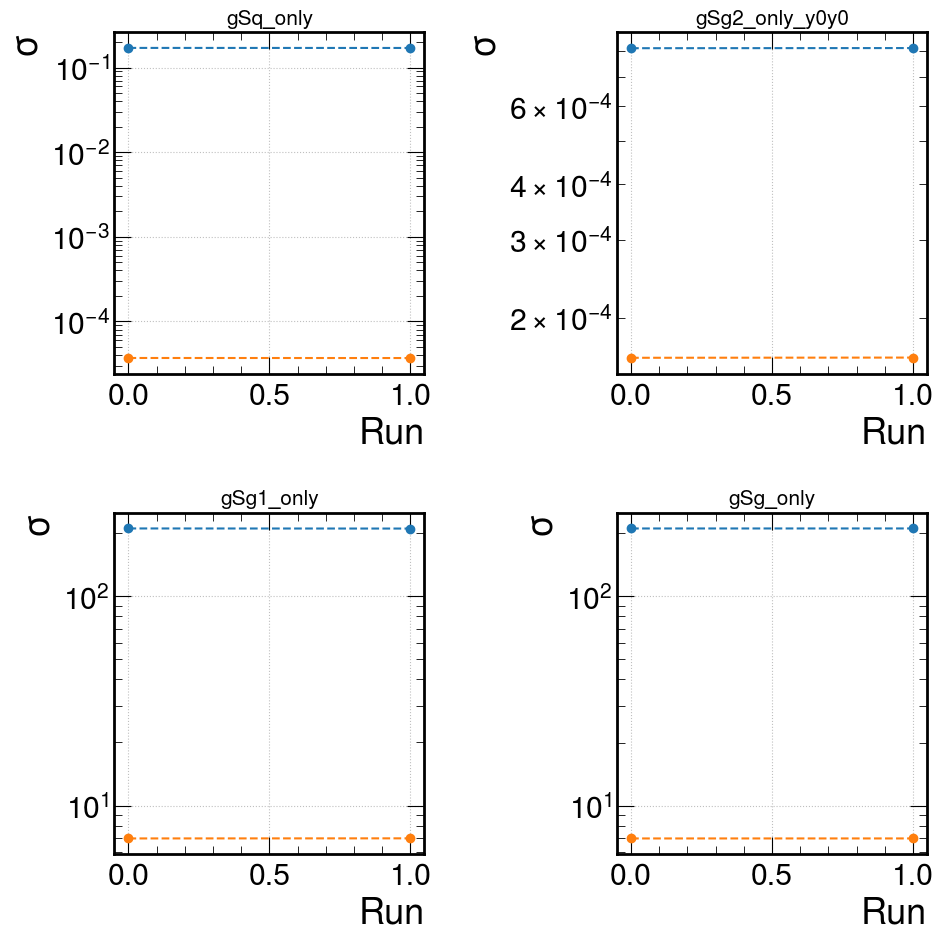

In [19]:
fig, ax = plt.subplots(2,2)
for i in range(2):
    ax[0,0].errorbar(CSs["run"], CSs[f"{cases[0]}_{i+1}"], yerr=CSs[f"error{cases[0]}_{i+1}"], marker='o', linestyle='--', ecolor='black', capsize=3)
    ax[1,0].errorbar(CSs["run"], CSs[f"{cases[1]}_{i+1}"], yerr=CSs[f"error{cases[1]}_{i+1}"], marker='o', linestyle='--', ecolor='black', capsize=3)
    ax[0,1].errorbar(CSs["run"], CSs[f"{cases[2]}_{i+1}"], yerr=CSs[f"error{cases[2]}_{i+1}"], marker='o', linestyle='--', ecolor='black', capsize=3)
    ax[1,1].errorbar(CSs["run"], CSs[f"{cases[3]}_{i+1}"], yerr=CSs[f"error{cases[3]}_{i+1}"], marker='o', linestyle='--', ecolor='black', capsize=3)
ax[0,0].set_title(cases[0], fontsize=15)
ax[1,0].set_title(cases[1], fontsize=15)
ax[0,1].set_title(cases[2], fontsize=15)
ax[1,1].set_title(cases[3], fontsize=15)
for i in range(2):
    for j in range(2):
        ax[i,j].set_ylabel(r'$\sigma$')
        ax[i,j].set_xlabel('Run')
        ax[i,j].set_yscale('log')
        ax[i,j].grid()
fig.tight_layout()
plt.show()

In [24]:
print(CSs['gSq_only_1'].mean(), CSs['errorgSq_only_1'].mean())

0.170535 0.00028700000000000004


In [27]:
CSS = {}
for i in cases:
    CSS[i] = []
    CSS[f'error{i}'] = []
    for j in range(nMassPoints):
        CSS[f'{i}'].append(CSs[f'{i}_{j+1}'].mean())
        CSS[f'error{i}'].append(CSs[f'error{i}_{j+1}'].mean())

In [28]:
CSS

{'gSq_only': [0.170535, 3.6982e-05],
 'errorgSq_only': [0.00028700000000000004, 6.53e-08],
 'gSg1_only': [210.265, 6.9670000000000005],
 'errorgSg1_only': [0.269, 0.0112],
 'gSg2_only_y0y0': [0.00081182, 0.00016269],
 'errorgSg2_only_y0y0': [9.375000000000001e-07, 2.745e-07],
 'gSg_only': [210.35500000000002, 6.9663],
 'errorgSg_only': [0.255, 0.011349999999999999]}

In [29]:
pd.DataFrame(CSS).to_csv('signalCS.csv')